In [1]:
from loader import loadData
import pandas as pd
import matplotlib.pyplot as plt



Load the data

In [2]:
df = loadData()

Look at the data


In [3]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/25/2019 9:10,200.0,4/27/2019 10:34,514.0,177811.0,2.082017e+14,3.365100e+10,3.599481e+13,D79188A,...,665982.0,21141211.0,1170778.0,6870432.0,406166851.0,15978587.0,645981000.0,2128371.0,50116254.0,419438717.0
1,1.304243e+19,4/25/2019 9:11,769.0,4/27/2019 10:25,138.0,177237.0,2.082014e+14,3.376009e+10,8.637690e+13,T85703C,...,11761590.0,4877960.0,17456621.0,21326234.0,2168723.0,6883415.0,250915272.0,6875405.0,44563771.0,38448608.0
2,7.349883e+18,4/25/2019 9:11,963.0,4/27/2019 10:18,115.0,176820.0,2.082017e+14,3.361729e+10,3.532631e+13,D14006B,...,5591768.0,3486441.0,7593720.0,21002658.0,576202894.0,7238922.0,51143440.0,14101400.0,49686033.0,603242752.0
3,1.304243e+19,4/25/2019 9:11,861.0,4/27/2019 1:35,182.0,145486.0,2.082019e+14,3.376013e+10,8.637690e+13,T78168B,...,13041807.0,13469709.0,4497137.0,5709330.0,78773107.0,10650856.0,5072437.0,11499577.0,44837379.0,101362479.0
4,7.349883e+18,4/25/2019 9:11,98.0,4/27/2019 6:50,649.0,164368.0,2.082010e+14,3.362858e+10,8.627420e+13,D73333C,...,8975759.0,6876677.0,7101503.0,14461102.0,368424187.0,273590.0,843169197.0,13756536.0,39230356.0,391684321.0


TASK 2 USER OVERVIEW ANALYSIS   

Top 10 Handsets

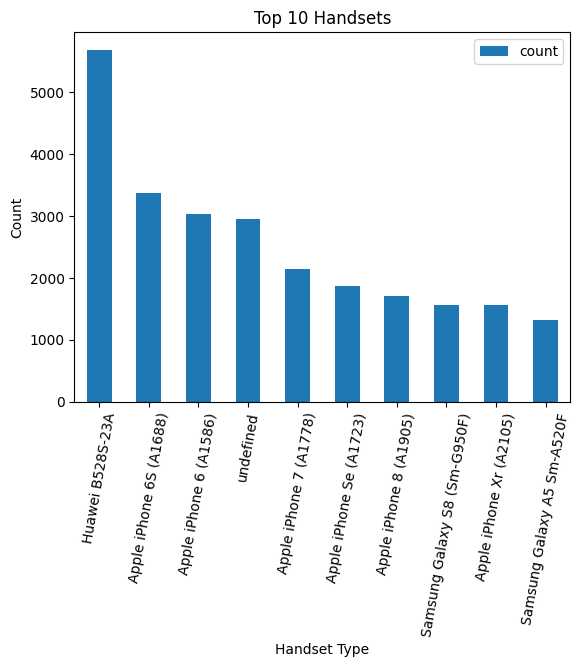

In [4]:

value_counts = df['Handset Type'].value_counts()[:10]
top_10_handsets = value_counts.index.tolist()
#print(value_counts)
#print(top_10_handsets)

top_10_df = pd.DataFrame(value_counts)
top_10_df.plot(kind= 'bar',rot=80)
plt.xlabel('Handset Type')
plt.ylabel('Count')
plt.title('Top 10 Handsets')
plt.show(10)





The top 3 handset manufacturers

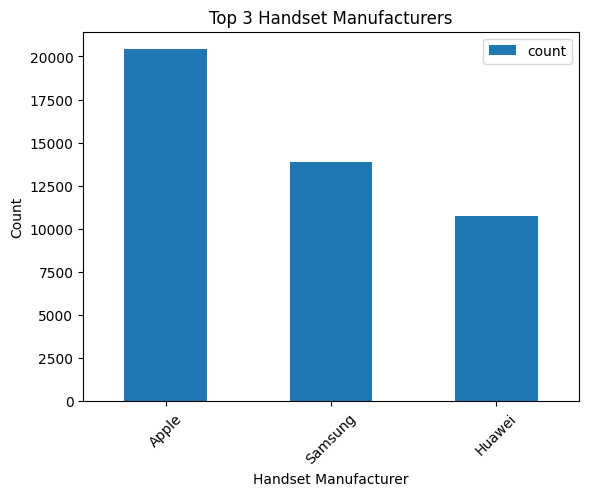

In [5]:
value_counts = df['Handset Manufacturer'].value_counts()[:3]
top_3_manufacturers = value_counts.index.tolist()

top_3_df = pd.DataFrame(value_counts)
top_3_df.plot(kind='bar', rot=45)

plt.xlabel('Handset Manufacturer')
plt.ylabel('Count')
plt.title('Top 3 Handset Manufacturers')
plt.show()


Top 5 handsets per top 3 manufacturer

Handset Type
Apple iPhone 6S (A1688)    3365
Apple iPhone 6 (A1586)     3031
Apple iPhone 7 (A1778)     2140
Apple iPhone Se (A1723)    1863
Apple iPhone 8 (A1905)     1710
Name: count, dtype: int64


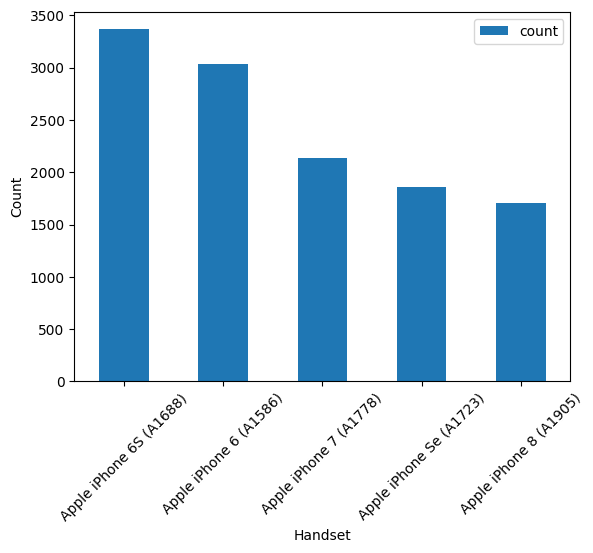

Handset Type
Samsung Galaxy S8 (Sm-G950F)    1563
Samsung Galaxy A5 Sm-A520F      1323
Samsung Galaxy J3 (Sm-J330)     1154
Samsung Galaxy J5 (Sm-J530)     1142
Samsung Galaxy S7 (Sm-G930X)    1125
Name: count, dtype: int64


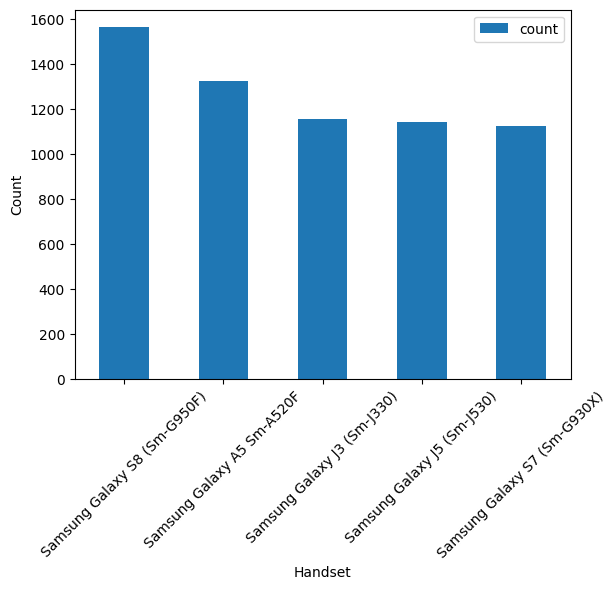

Handset Type
Huawei B528S-23A                  5683
Huawei P20 Lite Huawei Nova 3E     697
Huawei E5180                       691
Huawei P20                         518
Huawei Y6 2018                     355
Name: count, dtype: int64


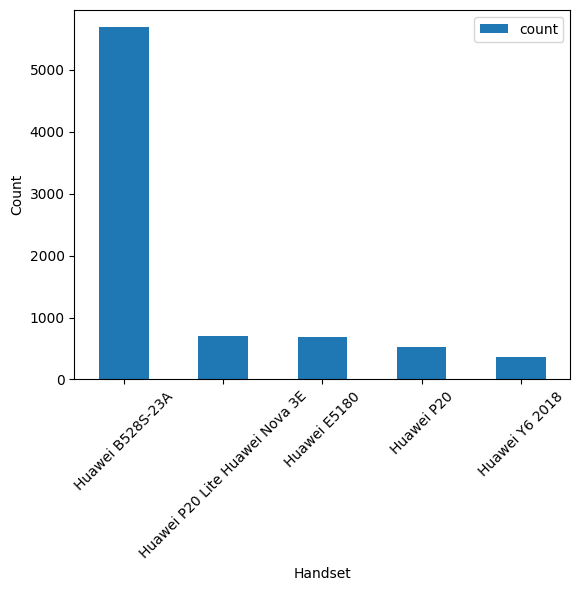

['Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)', 'Apple iPhone 7 (A1778)', 'Apple iPhone Se (A1723)', 'Apple iPhone 8 (A1905)', 'Samsung Galaxy S8 (Sm-G950F)', 'Samsung Galaxy A5 Sm-A520F', 'Samsung Galaxy J3 (Sm-J330)', 'Samsung Galaxy J5 (Sm-J530)', 'Samsung Galaxy S7 (Sm-G930X)', 'Huawei B528S-23A', 'Huawei P20 Lite Huawei Nova 3E', 'Huawei E5180', 'Huawei P20', 'Huawei Y6 2018']


In [6]:
top_5_handsets = []
all_top_handsets = []
for manufacturer in top_3_manufacturers:
    manufacturer_df = df[df['Handset Manufacturer'] == manufacturer]
    handset_counts = manufacturer_df['Handset Type'].value_counts()[:5]
    all_top_handsets.append(handset_counts)
    top_5_handsets.extend(handset_counts.index.tolist())
for top_handsets in all_top_handsets:
    print(top_handsets)
    top_handsets_df = pd.DataFrame(top_handsets)
    top_handsets_df.plot(kind='bar', rot=45)
    plt.xlabel('Handset')
    plt.ylabel('Count')
    plt.title('')
    plt.show()
    
print(top_5_handsets)



Number of xdr sessions

In [7]:

xdr_sessions_aggregate = df.groupby("MSISDN/Number").agg({"Google DL (Bytes)": "count", 
                                                            "Google UL (Bytes)":"count",
                                                            "Email DL (Bytes)": "count",
                                                            "Email UL (Bytes)": "count",
                                                            "Youtube DL (Bytes)": "count",
                                                            "Youtube UL (Bytes)": "count",
                                                            "Netflix DL (Bytes)": "count",
                                                            "Netflix UL (Bytes)": "count",
                                                            "Gaming DL (Bytes)": "count",
                                                            "Gaming UL (Bytes)": "count",
                                                            "Other DL (Bytes)": "count",
                                                            "Other UL (Bytes)": "count",
                                                            })

xdr_sessions_aggregate.head()


,Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
MSISDN/Number,,,,,,,,,,,,
3.360101e+10,1,1,1,1,1,1,1,1,1,1,1,1
3.360101e+10,1,1,1,1,1,1,1,1,1,1,1,1
3.360102e+10,1,1,1,1,1,1,1,1,1,1,1,1
3.360102e+10,1,1,1,1,1,1,1,1,1,1,1,1
3.360102e+10,1,1,1,1,1,1,1,1,1,1,1,1


Session duration

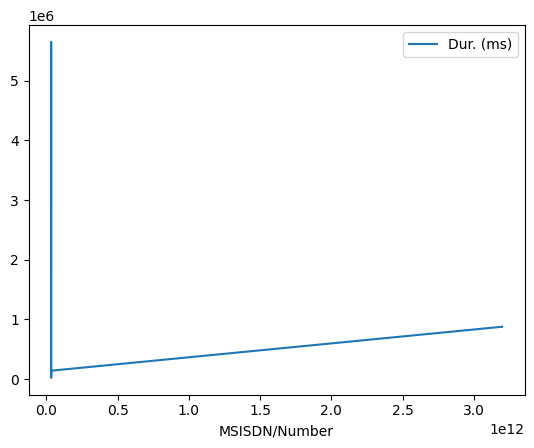

In [8]:
df.columns
xdr_sessions_duration = df.groupby("MSISDN/Number").agg({"Dur. (ms)":"sum"})
xdr_sessions_duration.head()
xdr_sessions_duration.plot()
plt.show()

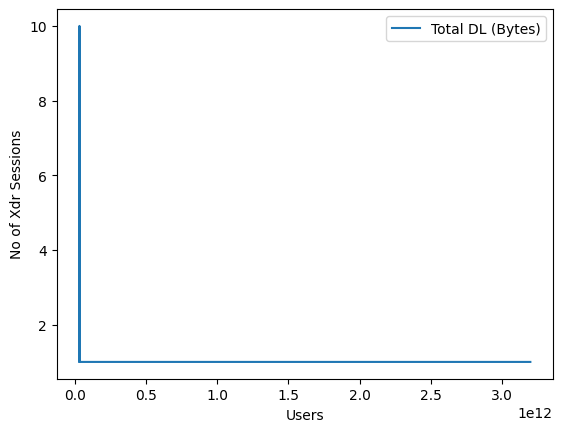

In [9]:
df.head()
aggregated_data = df.groupby("MSISDN/Number").agg({"Total DL (Bytes)": "count"})
aggregated_data.head(10)
aggregated_data.plot()
plt.ylabel("No of Xdr Sessions")
plt.xlabel("Users")
plt.show()


Total DL per user

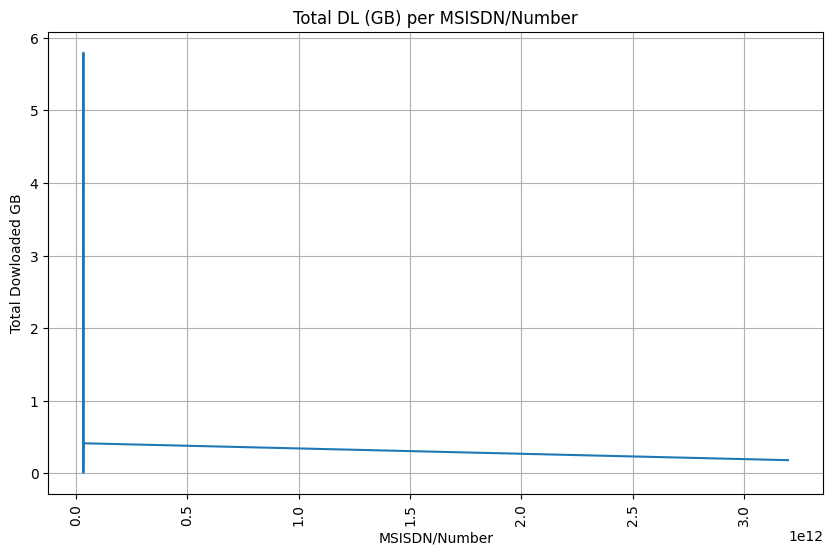

In [10]:
df.head()
aggregated_data = df.groupby("MSISDN/Number").agg({"Total DL (Bytes)": "sum"})
aggregated_data['Total DL (GB)'] = aggregated_data['Total DL (Bytes)'] / 1073741824
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data.index, aggregated_data['Total DL (GB)'])
plt.xlabel('MSISDN/Number')
plt.ylabel('Total Dowloaded GB')
plt.title('Total DL (GB) per MSISDN/Number')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Total UL per user

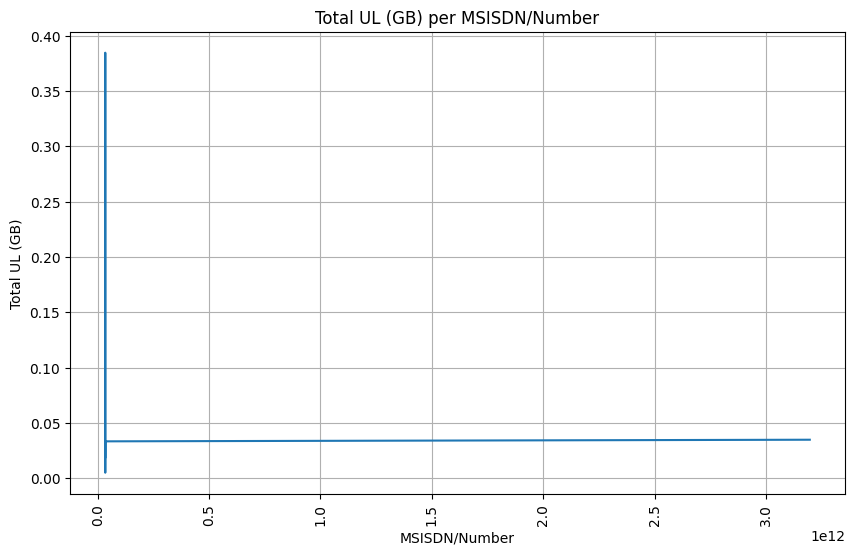

In [11]:
df.head()
aggregated_data = df.groupby("MSISDN/Number").agg({"Total UL (Bytes)": "sum"})
aggregated_data['Total UL (GB)'] = aggregated_data['Total UL (Bytes)'] / 1073741824
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data.index, aggregated_data['Total UL (GB)'])
plt.xlabel('MSISDN/Number')
plt.ylabel('Total UL (GB)')
plt.title('Total UL (GB) per MSISDN/Number')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

User Engagement Task 3

In [12]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/25/2019 9:10,200.0,4/27/2019 10:34,514.0,177811.0,2.082017e+14,3.365100e+10,3.599481e+13,D79188A,...,665982.0,21141211.0,1170778.0,6870432.0,406166851.0,15978587.0,645981000.0,2128371.0,50116254.0,419438717.0
1,1.304243e+19,4/25/2019 9:11,769.0,4/27/2019 10:25,138.0,177237.0,2.082014e+14,3.376009e+10,8.637690e+13,T85703C,...,11761590.0,4877960.0,17456621.0,21326234.0,2168723.0,6883415.0,250915272.0,6875405.0,44563771.0,38448608.0
2,7.349883e+18,4/25/2019 9:11,963.0,4/27/2019 10:18,115.0,176820.0,2.082017e+14,3.361729e+10,3.532631e+13,D14006B,...,5591768.0,3486441.0,7593720.0,21002658.0,576202894.0,7238922.0,51143440.0,14101400.0,49686033.0,603242752.0
3,1.304243e+19,4/25/2019 9:11,861.0,4/27/2019 1:35,182.0,145486.0,2.082019e+14,3.376013e+10,8.637690e+13,T78168B,...,13041807.0,13469709.0,4497137.0,5709330.0,78773107.0,10650856.0,5072437.0,11499577.0,44837379.0,101362479.0
4,7.349883e+18,4/25/2019 9:11,98.0,4/27/2019 6:50,649.0,164368.0,2.082010e+14,3.362858e+10,8.627420e+13,D73333C,...,8975759.0,6876677.0,7101503.0,14461102.0,368424187.0,273590.0,843169197.0,13756536.0,39230356.0,391684321.0


TASK 3 USER ENGAGEMENT ANALYSIS

Engagement metrics dataframe

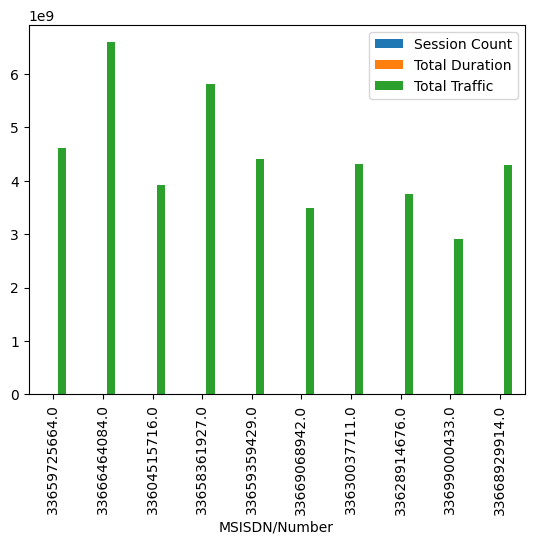

In [71]:
users_session = df.groupby("MSISDN/Number").agg({"Dur. (ms)": ["count","sum"],
                                                            "Total DL (Bytes)":"sum",
                                                            "Total UL (Bytes)":"sum"}).reset_index()
users_session.columns =  ['MSISDN/Number', 'Session Count', 'Total Duration', 'Total DL (Bytes)', 'Total UL (Bytes)'] 
users_session['Total Traffic'] = users_session['Total DL (Bytes)'] + users_session['Total UL (Bytes)']
users_session = users_session.sort_values("Session Count", ascending=False)[:10]
users_session = users_session.drop(columns=["Total DL (Bytes)","Total UL (Bytes)"])
users_session.plot(x='MSISDN/Number', y=['Session Count', 'Total Duration', 'Total Traffic'], kind='bar')
plt.show()

top 10 users by session Count

<Axes: xlabel='MSISDN/Number'>

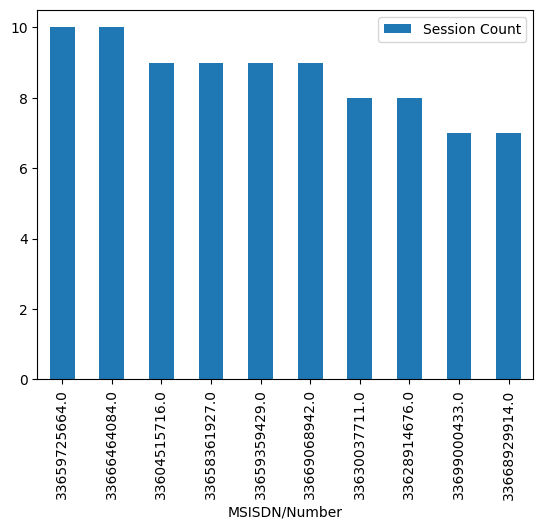

In [77]:
top_10_by_session_count = users_session.sort_values("Session Count", ascending=False)[:10]
top_10_by_session_count.plot(kind='bar', x="MSISDN/Number",y="Session Count")

top 10 users with Sessions duration


<Axes: xlabel='MSISDN/Number'>

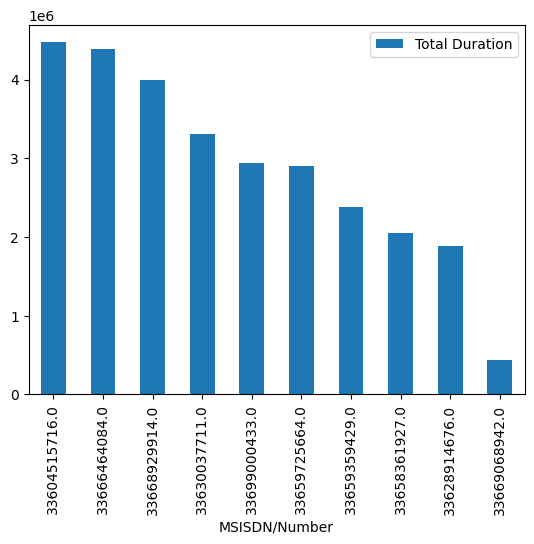

In [79]:
top_10_by_session_duration = users_session.sort_values("Total Duration", ascending=False)[:10]
top_10_by_session_duration.plot(kind='bar', x="MSISDN/Number",y="Total Duration")

Top 10 users by total traffic DL + UL

<Axes: xlabel='MSISDN/Number'>

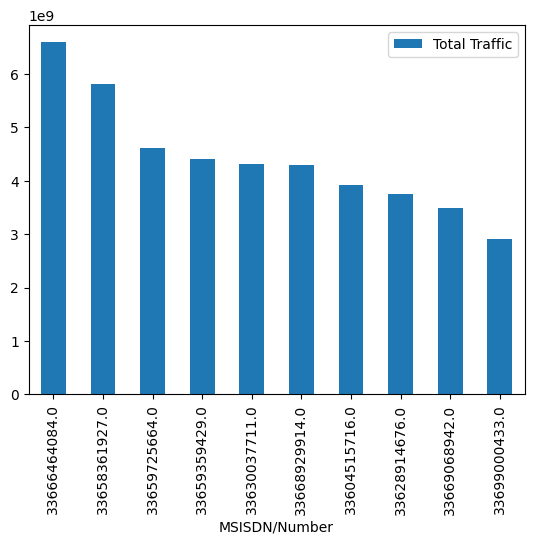

In [80]:
top_10_by_total_traffic = users_session.sort_values("Total Traffic", ascending=False)[:10]
top_10_by_total_traffic.plot(kind='bar', x="MSISDN/Number",y="Total Traffic")

Normalize

In [83]:
users_session.columns

Index(['MSISDN/Number', 'Session Count', 'Total Duration', 'Total Traffic'], dtype='object')

In [101]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ["Session Count","Total Duration","Total Traffic"]
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(users_session[columns_to_normalize]), columns=columns_to_normalize, index=users_session.index)
df_normalized = pd.concat([df_normalized, users_session.drop(columns=columns_to_normalize)], axis=1)
df_normalized.head()

,Session Count,Total Duration,Total Traffic,MSISDN/Number
14097,1.000000,0.612011,0.462575,3.365973e+10
24190,1.000000,0.978679,1.000000,3.366646e+10
471,0.666667,1.000000,0.273668,3.360452e+10
11680,0.666667,0.398606,0.787819,3.365836e+10
13474,0.666667,0.483035,0.408007,3.365936e+10
